## Student Performance Prediction Project: 
This project focuses on predicting student performance using features such as hours studied, previous scores, extracurricular activities, sleep hours, and the number of sample question papers practiced, providing insights into their impact on the performance index.


#### Data Exploration and Understanding. 

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\csv file\Student_Performance.csv")

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [7]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

### Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [9]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# * Visualization *

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

### Pair Plot

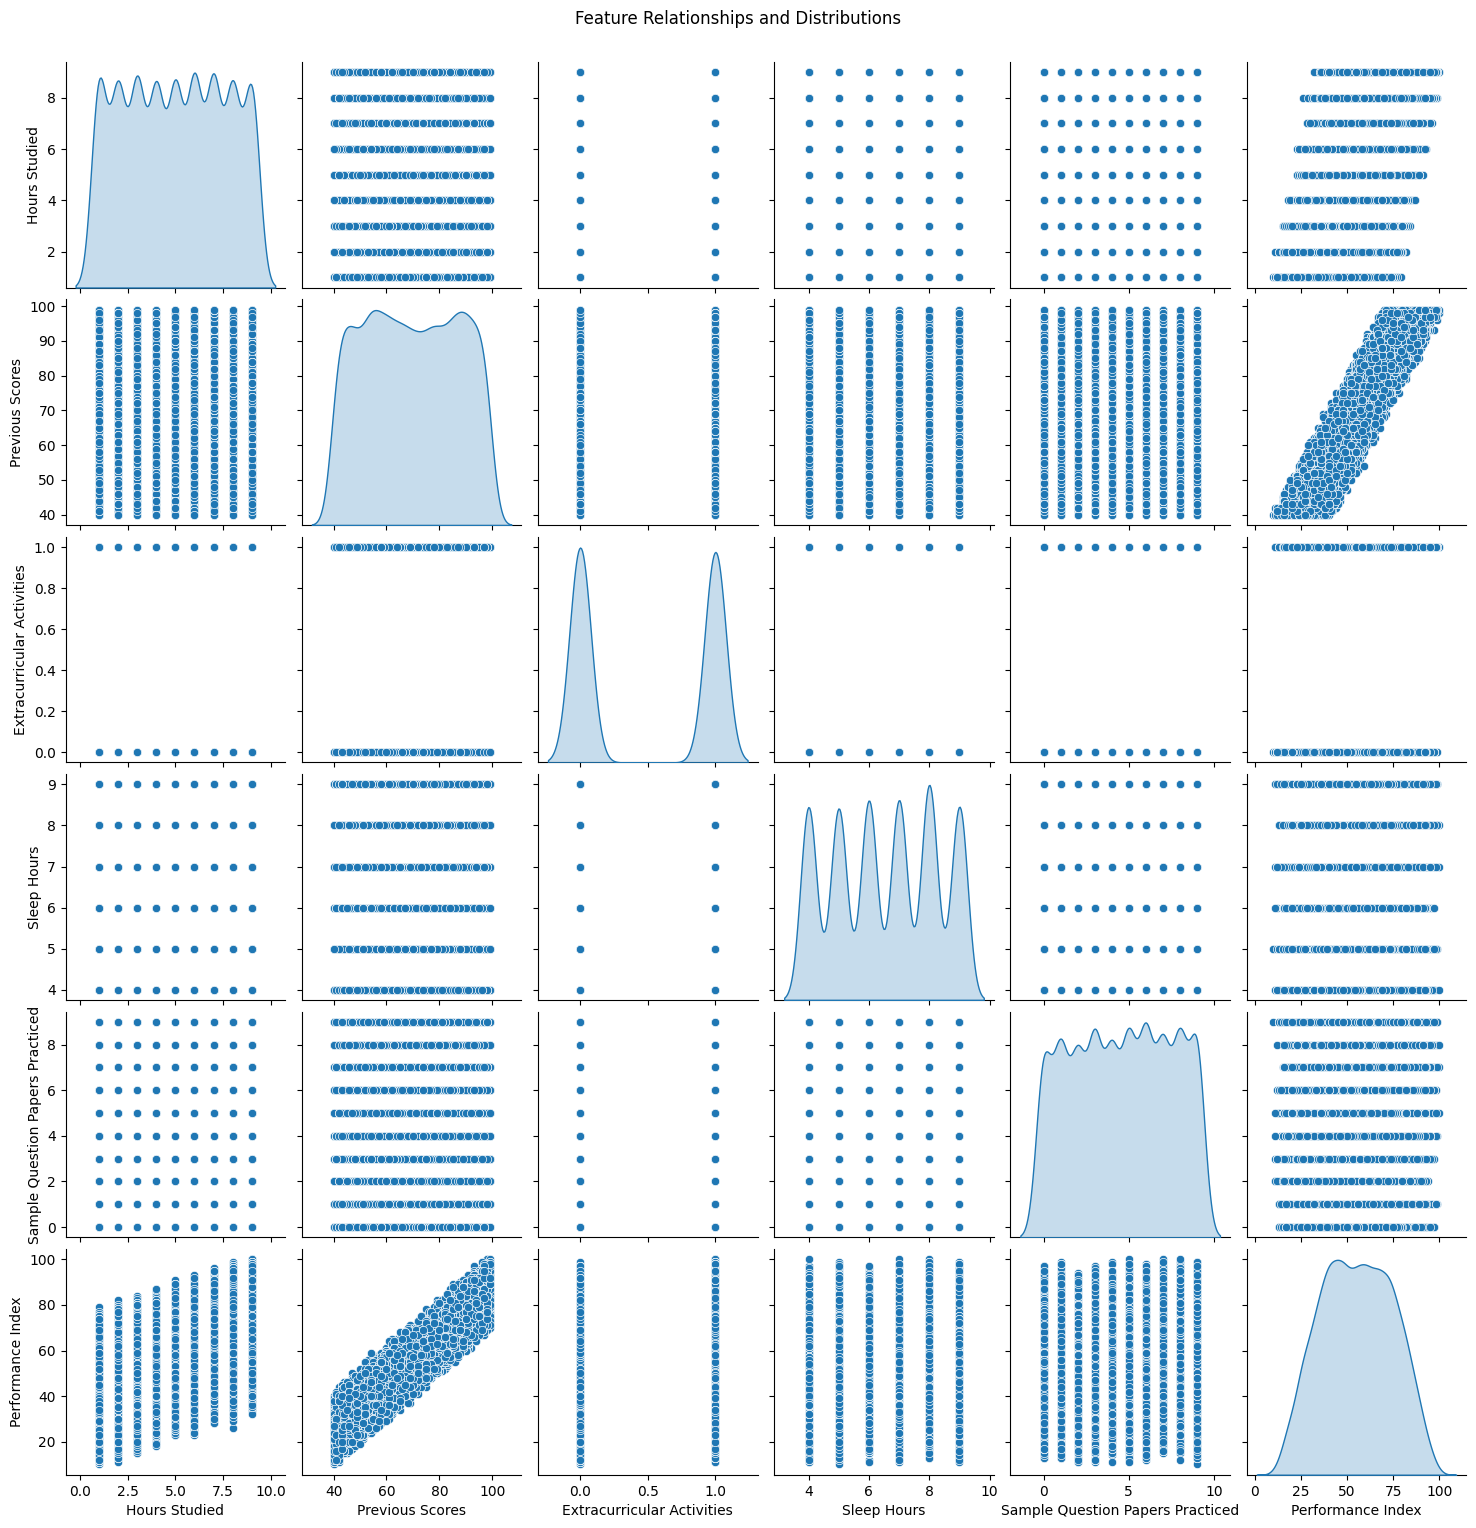

In [12]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Feature Relationships and Distributions', y=1.02)
plt.show()

### Line Plot. Hours Studied vs Performance Index

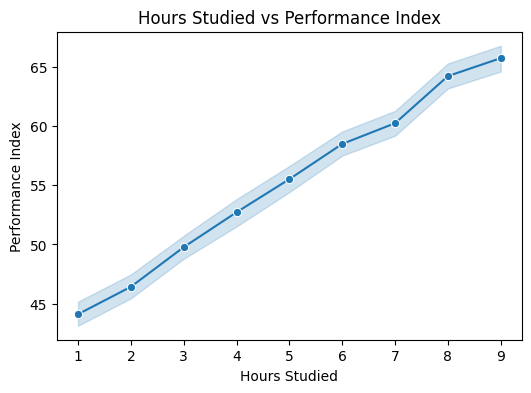

In [13]:
plt.figure(figsize=(6, 4))
sns.lineplot(x=df['Hours Studied'], y=df['Performance Index'], marker='o')
plt.title('Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()


### Count Plot

C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_8128\1069262396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Hours Studied'], palette='viridis')


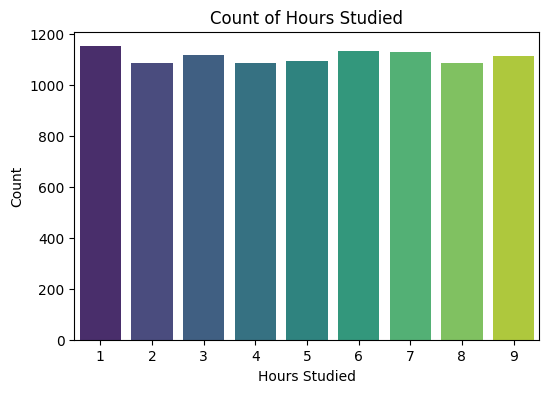

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Hours Studied'], palette='viridis')
plt.title('Count of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Count')
plt.show()

# Regression Models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score

### train_test_split

In [16]:
X=df.drop(columns=['Performance Index'])
y=df['Performance Index']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)

(8000, 5)
(2000, 5)


### Linear Regression

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.105609215835832
R-squared: 0.9880686410711422


### Lasso

In [21]:
Lasso = Lasso()
Lasso.fit(X_train,y_train)
y_pred2 = Lasso.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.847039289943027
R-squared: 0.9859139624668801


### Ridge

In [23]:
Ridge = Ridge()
Ridge.fit(X_train,y_train)
y_pred3 = Ridge.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.105573085034647
R-squared: 0.9880687460712858


## Conclusion
#### This project successfully predicts student performance using a linear regression model with a high **R² score of 98%**, indicating an excellent fit. The model leverages key features such as **Hours Studied**, **Previous Scores**, **Extracurricular Activities**, **Sleep Hours**, and **Sample Question Papers Practiced** to accurately estimate the **Performance Index**.
